In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
final=pd.read_csv('preprocessed_file.csv')
final.head()

,Time,clean text,Score
0,939340800,witty little book makes son laugh loud recite ...,1
1,1194739200,grew reading sendak books watching really rosi...,1
2,1191456000,fun way children learn months year learn poems...,1
3,1076025600,great little book read aloud nice rhythm well ...,1
4,1018396800,book poetry months year goes month cute little...,1


In [3]:
final.isnull().any()

Time          False
clean text     True
Score         False
dtype: bool

In [12]:
final_data=final.dropna()

In [13]:
final_data.isnull().any()

Time          False
clean text    False
Score         False
dtype: bool

In [14]:
final_data.head(3)

,Time,clean text,Score
0,939340800,witty little book makes son laugh loud recite ...,1
1,1194739200,grew reading sendak books watching really rosi...,1
2,1191456000,fun way children learn months year learn poems...,1


In [15]:

final_data.shape

(363192, 3)

In [16]:
sample_data=final_data.sample(100000,random_state=42)

In [17]:
print(sample_data.shape)
print(sample_data.columns)

(100000, 3)
Index(['Time', 'clean text', 'Score'], dtype='object')


In [19]:
X=sample_data['clean text']
Y=sample_data["Score"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(70000,) (70000,)
(30000,) (30000,)


In [20]:
Y.value_counts()

1    84314
0    15686
Name: Score, dtype: int64

### Applying BOW

In [21]:
count_vect=CountVectorizer()
x_train_bow=count_vect.fit_transform(X_train)

In [22]:
print("Features name:",count_vect.get_feature_names()[:10])

Features name: ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaarrrrrggghhh', 'aaaaaahhh', 'aaaaaahhhh', 'aaaaaahhhhh', 'aaaaah']


In [25]:
print(type(x_train_bow))

<class 'scipy.sparse._csr.csr_matrix'>


In [26]:
print(type(X_test))

<class 'pandas.core.series.Series'>


In [28]:
x_test_bow = count_vect.transform(X_test.values)
print(type(x_test_bow))
print(x_test_bow.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(30000, 51227)


In [35]:
s = StandardScaler(with_mean=False)
X_train_stand = s.fit_transform(x_train_bow)
X_test_stand = s.transform(x_test_bow)


The optimal number of neighbors is 7.


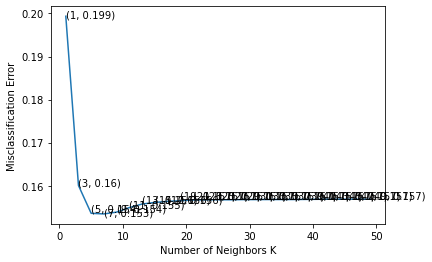

the misclassification error for each k value is :  [0.199 0.16  0.154 0.153 0.154 0.155 0.156 0.156 0.156 0.157 0.157 0.157
 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157 0.157
 0.157]


In [36]:
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_stand, Y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k) 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [40]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
# fitting the model
knn_optimal.fit(X_train_stand, Y_train)
# predict the response
pred = knn_optimal.predict(X_test_stand)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 7 is 84.800000%


In [47]:
confusion_matrix(Y_test,pred)

array([[  265,  4441],
       [  119, 25175]], dtype=int64)